# Εργαστηριακή Άσκηση 3
## Εργαστήριο Βιοϊατρικής Τεχνολογίας

Ονοματεπώνυμο: Τερέζα Άννα Βασιλείου

Αριθμός μητρώου: 03120403

Ομάδα εργαστηρίου: 9

## Α' Μέρος

Να γίνει αναζήτηση από τη βιβλιογραφική μηχανή αναζήτησης PubMed 50 άρθρων που σχετίζονται με το συγκεκριμένο όρο για το έτος 2013.

In [ ]:
!pip install metapub

In [4]:
#dependencies
import pandas as pd
from metapub import PubMedFetcher

Ορίζω τη λέξη κλειδί την οποία θέλω να αναζητήσω, την επιθυμητή χρονιά άρθρων, αλλά και τον αριθμό των άρθρων που θέλω να εμφανίσω.

In [5]:
fetch = PubMedFetcher()
keyword1 = 'e-Prescription'
keyword2 = 'e-prescription'
keyword3 = 'eprescription'
keyword4 = 'E-prescription'
keyword5 = 'Eprescription'
keyword6 = 'eprescribing'
keyword7 = 'e-prescribing'
num_of_articles = 50

In [6]:
#get the PMID for all articles with keyword 'eprescription'
pmids_1 = fetch.pmids_for_query(keyword1)
pmids_2 = fetch.pmids_for_query(keyword2)
pmids_3 = fetch.pmids_for_query(keyword3)
pmids_4 = fetch.pmids_for_query(keyword4)
pmids_5 = fetch.pmids_for_query(keyword5)
pmids_6 = fetch.pmids_for_query(keyword6)
pmids_7 = fetch.pmids_for_query(keyword7)


combined_set = set(pmids_1).union(set(pmids_2))
pmids = combined_set.union(set(pmids_3))
pmids1 = pmids.union(set(pmids_4))
pmids_al = pmids1.union(set(pmids_5))
pmids_al1 = pmids_al.union(set(pmids_6))
pmids_all = pmids_al1.union(set(pmids_7))

In [7]:
print("Rearch for articles with our keyword returned", len(pmids_all), "results.")

Rearch for articles with our keyword returned 690 results.


Για το κάθε ένα άρθρο από τα παραπάνω, επιλέγω αυτά που αντιστοιχούν στην επιθυμητή χρονιά.

In [9]:
years = {}
for pmid in pmids_all:
  years[pmid] = fetch.article_by_pmid(pmid).year
Year = pd.DataFrame(list(years.items()), columns = ['pmid', 'Year'])

In [11]:
Year2013 = Year[(Year['Year'] == '2013') | (Year['Year'] == 2013)]

In [ ]:
len(Year2013)

36

Βρέθηκαν 36 άρθρα για τον όρο 'e-prescription' για το 2013 και θα χρησιμοποιήσω αυτά παρακάτω.

α) Παρακάτω φαίνονται τα IDs των άρθρων που συλλέχθηκαν.

In [15]:
pmids = Year2013.loc[:, 'pmid'].reset_index(drop=True)

In [17]:
pmids = pd.DataFrame(pmids)

In [18]:
pmids

,pmid
0,23708439
1,24261370
2,24371892
3,24088212
4,23335961
5,24116250
6,23940467
7,23714550
8,24416945
9,23823360


β) Τίτλοι 20 πρώτων άρθρων:

In [28]:
# Convert the 'pmid' column to integer type
lol = pmids['pmid'].astype(int)

In [31]:
# get title for each article:
titles = {}

for pmid in lol:
    try:
        # Fetch the article title for each PubMed ID
        title = fetch.article_by_pmid(pmid).title

        # Dictionary
        titles[pmid] = title
    except Exception as e:
        # Handle errors gracefully (you may want to log or display the error)
        print(f"Error fetching title for PMID {pmid}: {e}")

# Convert the dictionary to a DataFrame
Title = pd.DataFrame(list(titles.items()), columns=['pmid', 'Title'])

In [33]:
Titles = Title.head(20)

In [35]:
Titles

,pmid,Title
0,23708439,e-Prescribing: characterisation of patient saf...
1,24261370,Optimizing radiologist e-prescribing of CT ora...
2,24371892,E-prescribing controlled substances moves clos...
3,24088212,Patient safety perspectives of providers and n...
4,23335961,Investigating and learning lessons from early ...
5,24116250,Correction: Investigating and Learning Lessons...
6,23940467,Physicians and pharmacists call for more rapid...
7,23714550,Perspectives on electronic prescribing and ter...
8,24416945,The effects of electronic prescribing by commu...
9,23823360,The new Greek national e-prescription system: ...


γ) Περιλήψεις των 4 τελευταίων:

In [37]:
abstracts = {}
for pmid in lol.tail(4):
    abstracts[pmid] = fetch.article_by_pmid(pmid).abstract
Abstract = pd.DataFrame(list(abstracts.items()),columns = ['pmid','Abstract'])
Abstract

,pmid,Abstract
0,24512036,OBJECTIVES: To investigate differences before ...
1,23388319,Electronic prescribing (e-prescribing) is expe...
2,23898586,None
3,23800087,OBJECTIVE: To describe small area variation in...


## B' Μέρος

1.

In [55]:
data = pd.read_csv("icd10.csv", header=0, sep=";")

In [58]:
data

,code,name
0,A000,"Cholera due to Vibrio cholerae 01, biovar chol..."
1,A001,"Cholera due to Vibrio cholerae 01, biovar eltor"
2,A009,"Cholera, unspecified"
3,A0100,"Typhoid fever, unspecified"
4,A0101,Typhoid meningitis
...,...,...
71699,Z9912,Encounter for respirator dependence during pow...
71700,Z992,Dependence on renal dialysis
71701,Z993,Dependence on wheelchair
71702,Z9981,Dependence on supplemental oxygen


2. a) Β403

In [60]:
disease1 = data[data['code'] == 'B403']

In [61]:
disease1

,code,name
786,B403,Cutaneous blastomycosis


b) T403

In [98]:
filtered_data = data[data['code'].str.startswith('T403')]

In [99]:
disease2 = filtered_data.head(1)

In [100]:
disease2

,code,name
57641,T403X1A,"Poisoning by methadone, accidental (unintentio..."


c) random

In [101]:
import numpy as np
ran_index = np.random.choice(data.index)
disease3 = data.loc[ran_index]
disease3 = pd.DataFrame(disease3)

In [108]:
disease3 = disease3.transpose()

In [109]:
disease3

,code,name
45342,S76111S,"Strain of right quadriceps musc/fasc/tend, seq..."


3. Συνολικός αριθμός ασθενειών που σχετίζονται με τις παραπάνω 3 ασθένειες τα τελευταία 4 χρόνια.

Ορίζω τα keywords:

In [110]:
dis1 = disease1.iloc[0, 1]
dis2 = disease2.iloc[0, 1]
dis3 = disease3.iloc[0, 1]

In [213]:
split2 = dis2.split(', ')

In [238]:
split3 = dis3.split(', ')

In [243]:
dis3

'Strain of right quadriceps musc/fasc/tend, sequela'

In [244]:
fetch = PubMedFetcher()
pmidss1 = fetch.pmids_for_query(dis1)
pmidss2 = fetch.pmids_for_query(split2[0])
pmidss3 = fetch.pmids_for_query('Strain of right quadriceps')

In [326]:
years = {}
for pmid in pmidss1:
  years[pmid] = fetch.article_by_pmid(pmid).year
Year1 = pd.DataFrame(list(years.items()), columns = ['pmid', 'Year'])

In [185]:
four_years = [2020, 2021, 2022, 2023]
Year1['Year'] = pd.to_numeric(Year1['Year'], errors='coerce')
Year1_4y = []
for year in four_years:
  Year1_4 = Year1[Year1['Year'] == year]
  Year1_4y.append(Year1_4)
result1 = pd.concat(Year1_4y)
pan = pd.DataFrame(result1)

Ο αριθμός άρθρων για την πρώτη ασθένεια τα 4 τελευταία χρόνια:

In [186]:
num1 = len(pan)
num1

31

Επαναλαμβάνω για τις άλλες 2 ασθένειες.

In [247]:
years = {}
for pmid in pmidss2:
  years[pmid] = fetch.article_by_pmid(pmid).year
Year2 = pd.DataFrame(list(years.items()), columns = ['pmid', 'Year'])

In [249]:
Year2['Year'] = pd.to_numeric(Year2['Year'], errors='coerce')
Year2_4y = []
for year in four_years:
  Year2_4 = Year2[Year2['Year'] == year]
  Year2_4y.append(Year2_4)
result2 = pd.concat(Year2_4y)
pan2 = pd.DataFrame(result2)

In [250]:
num2 = len(pan2)
num2

95

In [251]:
years = {}
for pmid in pmidss3:
  years[pmid] = fetch.article_by_pmid(pmid).year
Year3 = pd.DataFrame(list(years.items()), columns = ['pmid', 'Year'])

In [253]:
Year3['Year'] = pd.to_numeric(Year3['Year'], errors='coerce')
Year3_4y = []
for year in four_years:
  Year3_4 = Year3[Year3['Year'] == year]
  Year3_4y.append(Year3_4)
result3 = pd.concat(Year3_4y)
pan3 = pd.DataFrame(result3)

In [254]:
num3 = len(pan3)
num3

5

Ο συνολικός αριθμός των άρθρων που σχετίζονται με τις 3 ασθένειες τα τελευταία 4 χρόνια είναι ο εξής:

In [257]:
tot = num1 + num2 + num3
tot

131

4. Barplot



In [299]:
#for disease no1
d1_20 = Year1[Year1['Year'] == 2020]
d1_21 = Year1[Year1['Year'] == 2021]
d1_22 = Year1[Year1['Year'] == 2022]
d1_23 = Year1[Year1['Year'] == 2023]
n1_20 = len(d1_20)
n1_21 = len(d1_21)
n1_22 = len(d1_22)
n1_23 = len(d1_23)

In [300]:
#for disease no2
d2_20 = Year2[Year2['Year'] == 2020]
d2_21 = Year2[Year2['Year'] == 2021]
d2_22 = Year2[Year2['Year'] == 2022]
d2_23 = Year2[Year2['Year'] == 2023]
n2_20 = len(d2_20)
n2_21 = len(d2_21)
n2_22 = len(d2_22)
n2_23 = len(d2_23)

In [301]:
#for disease no3
d3_20 = Year3[Year3['Year'] == 2020]
d3_21 = Year3[Year3['Year'] == 2021]
d3_22 = Year3[Year3['Year'] == 2022]
d3_23 = Year3[Year3['Year'] == 2023]
n3_20 = len(d3_20)
n3_21 = len(d3_21)
n3_22 = len(d3_22)
n3_23 = len(d3_23)

In [297]:
import matplotlib.pyplot as plt
diseases = [dis1, split2[0], 'Strain of right quadriceps']

<Figure size 1000x600 with 0 Axes>

In [308]:
articles_by_disease_and_year = []
for i, disease in enumerate(diseases): #disease[0]
    articles_by_year = [globals()[f'n{i + 1}_{year}'] for year in range(20, 24)]
    articles_by_disease_and_year.append(articles_by_year)

In [315]:
articles_by_disease_and_year

[[6, 3, 12, 10], [31, 22, 24, 18], [2, 0, 2, 1]]

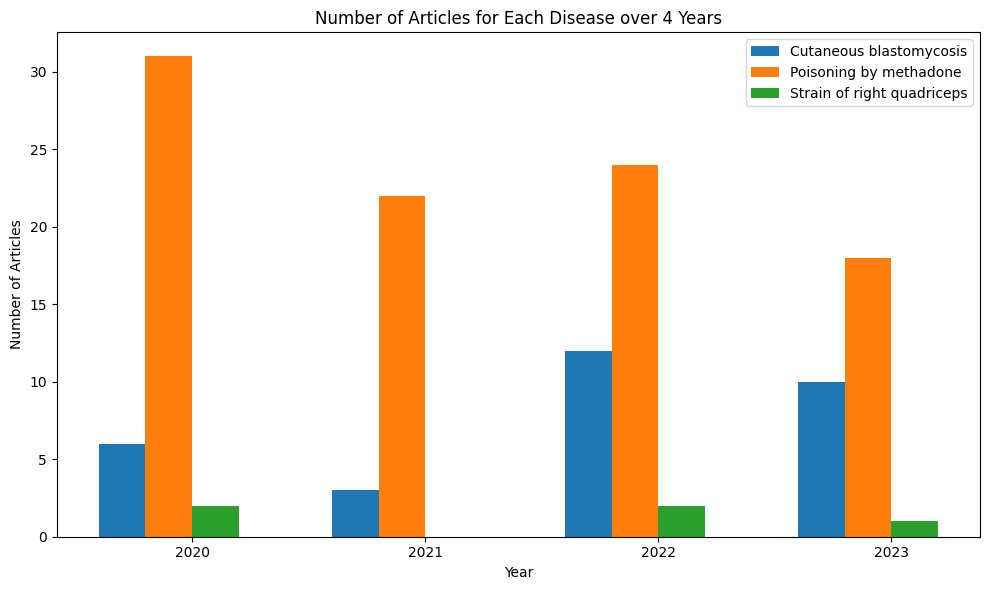

In [311]:
fig, ax = plt.subplots(figsize=(10, 6))
years = np.arange(2020, 2024)
bar_width = 0.2
for i, disease_data in enumerate(articles_by_disease_and_year):
    ax.bar(years + i * bar_width, disease_data, bar_width, label=diseases[i])

ax.set_xlabel('Year')
ax.set_ylabel('Number of Articles')
ax.set_title('Number of Articles for Each Disease over 4 Years')

ax.set_xticks(years + bar_width * len(diseases) / 2)
ax.set_xticklabels([str(year) for year in years])

ax.legend()

plt.tight_layout()
plt.show()

5. Treemap

In [ ]:
!pip install squarify
import squarify

In [316]:
articles_last_two_years = []
for disease_data in articles_by_disease_and_year:
    articles_last_two_years.append(disease_data[-2:])

In [317]:
articles_last_two_years

[[12, 10], [24, 18], [2, 1]]

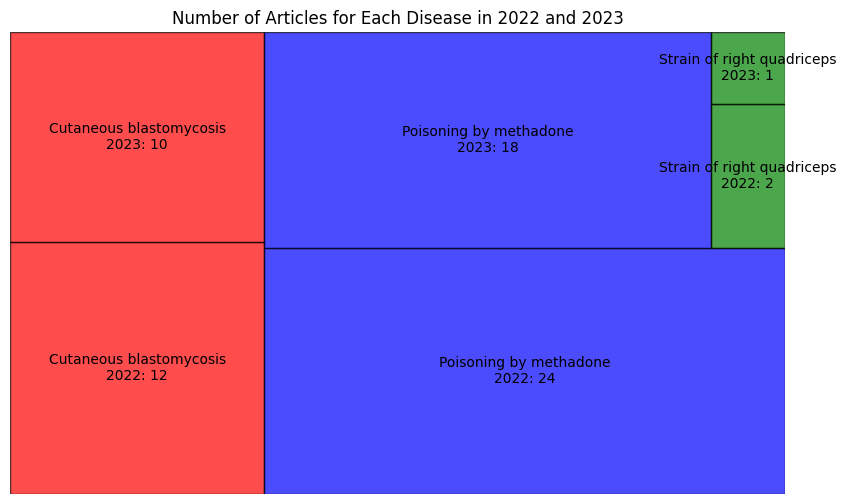

In [325]:
disease_labels = diseases
year_labels = ['2022', '2023']

# Define colors for each disease
disease_colors = ['red', 'blue', 'green']  # Add more colors if needed

# Calculate sizes for the treemap
sizes = [article for disease_data in articles_last_two_years for article in disease_data]

# Define labels for subgroups
labels = [f'{disease}\n{year_labels[i]}: {articles_last_two_years[disease_idx][i]}'
          for disease_idx, disease in enumerate(disease_labels)
          for i in range(len(year_labels))]

# Plot the treemap
plt.figure(figsize=(10, 6))
squarify.plot(sizes=sizes, label=labels, color=[disease_colors[disease_idx] for disease_idx in range(len(disease_labels)) for _ in range(len(year_labels))], alpha=0.7, edgecolor='black')
plt.title('Number of Articles for Each Disease in 2022 and 2023')
plt.axis('off')
plt.show()